In [3]:
import csv
import pandas as pd

import os

diamonds = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv')

In [4]:
diamonds.shape, print(diamonds.shape)  

(53940, 10)


((53940, 10), None)

at this point, I don't know why we are asked to print, rather than just call directly, print seems to add nothing new here.

In [6]:
diamonds.head(), diamonds.tail(10)

(   carat      cut color clarity  depth  table  price     x     y     z
 0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
 1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
 2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
 3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
 4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75,
        carat        cut color clarity  depth  table  price     x     y     z
 53930   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74  3.49
 53931   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73  3.43
 53932   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76  3.47
 53933   0.70  Very Good     E     VS2   61.2   59.0   2757  5.69  5.72  3.49
 53934   0.72    Premium     D     SI1   62.7   59.0   2757  5.69  5.73  3.58
 53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
 53936   0.72       G

In [8]:
diamonds.columns, diamonds.head(0)

(Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
        'z'],
       dtype='object'),
 Empty DataFrame
 Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
 Index: [])

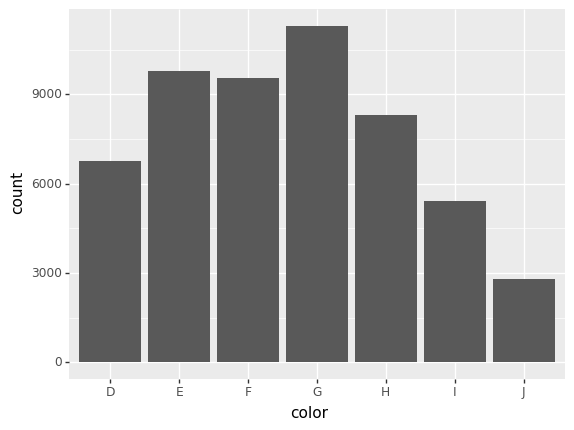

<ggplot: (351805263)>

In [10]:
from plotnine import *

ggplot(data = diamonds) + geom_bar(mapping= aes(x='color'))

The bar chart is a good way of representing categorical data but is not suitable for continuous data. For that,we must use a histogram. As an example, we shall examine the feature “carat”. 

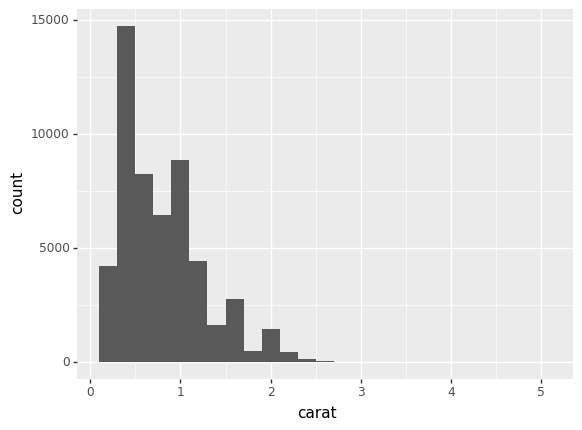

<ggplot: (351844413)>

In [11]:
ggplot(data = diamonds) + geom_histogram(mapping=aes(x= 'carat'), binwidth = 0.2)

Note that the term binwidth dictates the width of the bins. A smaller value for binwidth produces a more granular representation of the data.

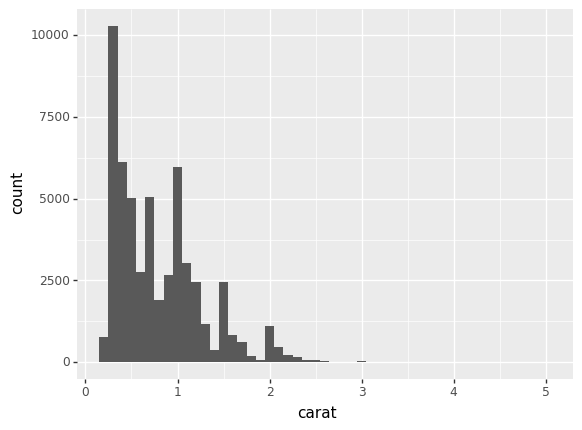

<ggplot: (351883834)>

In [12]:
ggplot(data = diamonds) + geom_histogram(mapping=aes(x= 'carat'), binwidth = 0.1)

it's interesting that the count seems to be different as a result of only changing the binwidth. 

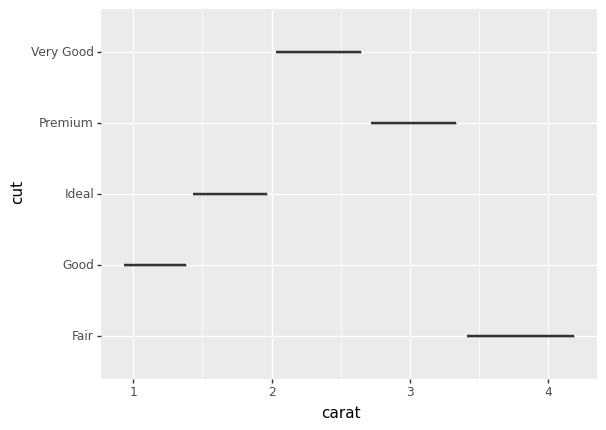

<ggplot: (351911021)>

In [13]:
ggplot(diamonds, aes("carat", "cut")) + geom_boxplot()

*NB* (note to self) it is essential to try swapping the axis, as the output looks considerably different...

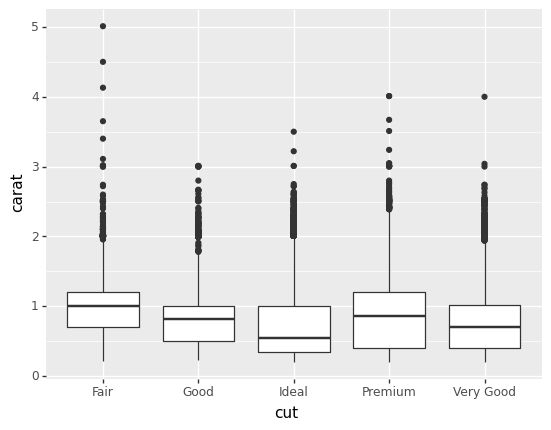

<ggplot: (351966748)>

In [14]:
ggplot(diamonds, aes("cut", "carat")) + geom_boxplot()

it is important that we remember never to trust the data implicitly during the exploration phases, and to always try to identify the assumptions we are making when dealing with any data

In [15]:
import numpy as np

np.random.seed(47)

sample1 = diamonds['carat'].sample(n=1000,replace=False)
sample2 = diamonds['carat'].sample(n=1000,replace=False)

In [17]:
sample1_df = sample1.to_frame()
sample2_df = sample2.to_frame()

/Users/dickinsd/miniforge3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


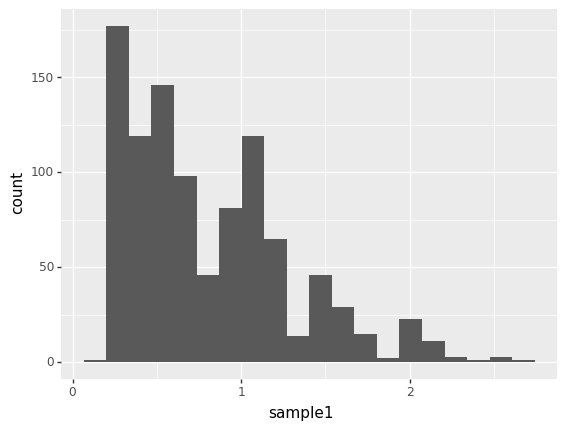

<ggplot: (352033814)>

In [18]:
ggplot(data= sample1_df) + geom_histogram(mapping= aes(x='sample1', binwidth = 0.1))

You should notice that while the profile of the samples is similar, there will also be many distinct differences. Consider then that almost all data that you ever handle will be just one sample out of many possible samples, and the dangers of assuming absolute truth from any data set become clear.

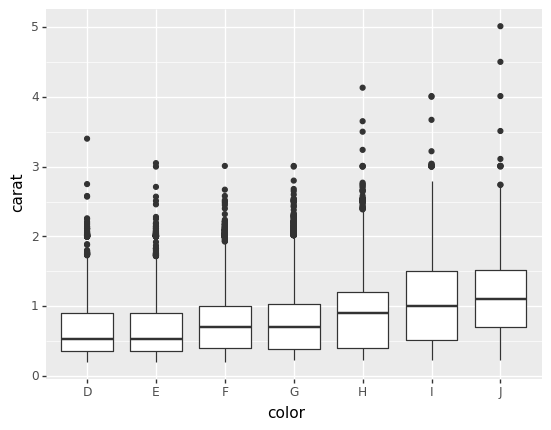

<ggplot: (352080270)>

In [19]:
ggplot(data= diamonds) + geom_boxplot(mapping=aes(x='color', y='carat'))

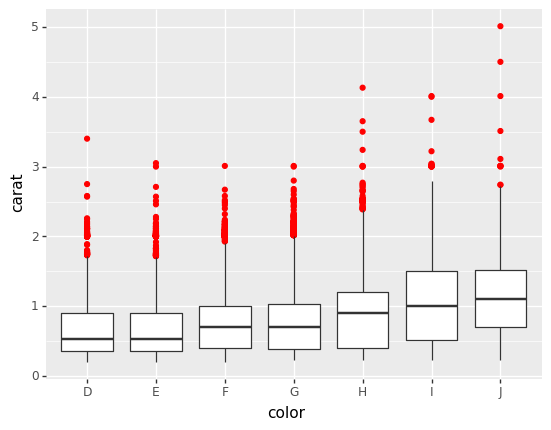

<ggplot: (352144168)>

In [20]:
ggplot(data= diamonds) + geom_boxplot(mapping=aes(x='color', y='carat'), outlier_color='red')

@Chloe - did I do something wrong here, it looks like everything is red now, I was expecting the further from the box, the more red or something like that

Let us try and establish whether these very high-carat diamonds have an equivalently high price, by creating a scatter plot mapping the two features. 

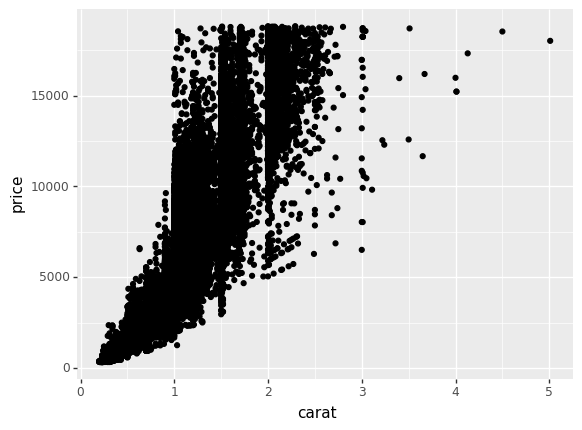

<ggplot: (352209571)>

In [21]:
ggplot(data = diamonds) + geom_point(mapping = aes(x = 'carat', y = 'price'))

We can see that there is a huge amount of variance among diamonds of the same or similar carat. This suggests that there may be one or more additional features responsible for this variance. Using ggplot2 allows us to add further dimensions into a two-dimensional plot through the use of pre- attentive attributes, such as shape, colour and size. For this task, we shall use different colours to map the cut quality of the diamond onto the scatter plot

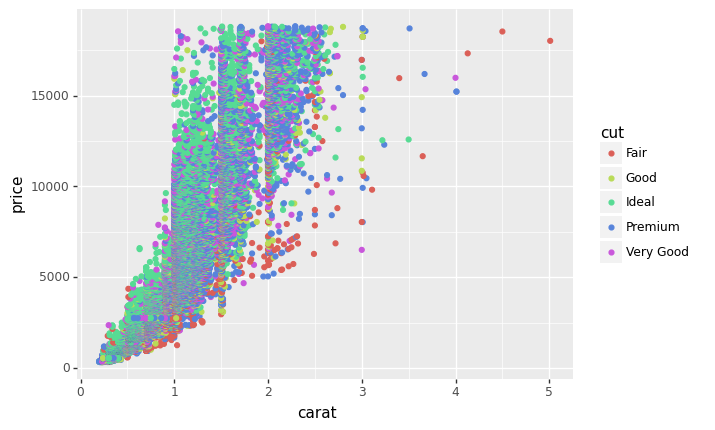

<ggplot: (352239089)>

In [22]:
ggplot(data = diamonds) + geom_point(mapping = aes(x='carat',y='price',color='cut'))

that looks much nicer! 

Now we can see that in fact price appears to be a function of carat and the quality of cut. The discovery of this relationship is why multivariate EDA is so powerful. If we were to build a model to try and predict the price of diamonds, we now know that “carat” and “cut” are two of the features that should be selected for inclusion.

When performing multivariate EDA, we will sometimes have to analyse the relationship between two categorical features, which prohibits the use of scatter plots. One method that we can use in lieu are frequency plots, which present a grid representing the possible combinations of two categorical features, with the size of objects in the plot showing the frequency occurrence of each.

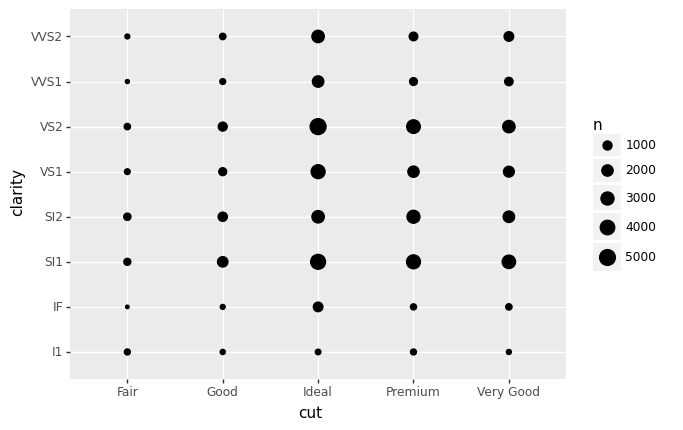

<ggplot: (378610017)>

In [23]:
ggplot(data = diamonds) + geom_count(mapping= aes(x='cut',y='clarity'))